In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\3834332404.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
Happy_df = {'2015':pd.read_csv('Data/2015.csv'),
            "2016": pd.read_csv('Data/2016.csv'),
            "2017":pd.read_csv('Data/2017.csv'), 
            "2018": pd.read_csv('Data/2018.csv'), 
            "2019":pd.read_csv('Data/2019.csv')}


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

NOTE: since we have multiple data sources we need to check them all without joining them since we are still in the early stages and don't know what kind of data each source contain 

In [3]:
#print the first 5 rows of data in 2015
# Happy_2015.head()
Happy_df['2015'].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#print the first 5 rows of data in 2016
Happy_df['2016'].head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
#print the first 5 rows of data in 2017
Happy_df['2017'].head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
#print the first 5 rows of data in 2018
Happy_df['2018'].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
#print the first 5 rows of data in 2019
Happy_df['2019'].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<strong>***************************************************************</strong>
<br>
As we can see from the above dataframes that most of the needed data are available, and each dataset share most of the columns that we needed.

<h3>So let's go through the most important variables:</h3>
<ul>
    <li><strong>Country: </strong>simply the name of the country.</li>
    <li><strong>Region: </strong>the name of the country's region.</li>
    <li><strong>Happiness Rank: </strong>the rank of the country based on the happiness score, where is first one has best happiness score.</li>
    <li><strong>Happiness Score: </strong>baste on the data from the Gallup World Poll, where they asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.</li>
    <li><strong>economic production, social support, life expectancy, freedom, Government Corruption, and generosity: </strong>These columns estimate the extent to which each one of them contribute to making life evaluations higher in each country than they are in Dystopia.</li>
    <li><strong>Dystopia Residual: </strong>The dystopia residual in the context of happiness or well-being indexes, such as the World Happiness Report, is a hypothetical benchmark used for comparison purposes. It represents a fixed value used as a reference point, indicating the lowest possible levels of happiness or well-being that could theoretically exist in a country.<li>
</ul>
<br>
<strong>***************************************************************</strong>

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [8]:
Happy_df['2015'].info()
print('===========')
print("The sahpe of the dataframe:", Happy_df['2015'].shape)
print("The dataframe columns:", Happy_df['2015'].columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
Happy_df['2016'].info()
print('===============================================')
print("The sahpe of the dataframe:", Happy_df['2016'].shape)
print("The dataframe columns:", Happy_df['2016'].columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [10]:
Happy_df['2017'].info()
print('===============================================')
print("The sahpe of the dataframe:", Happy_df['2017'].shape)
print("The dataframe columns:", Happy_df['2017'].columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [11]:
Happy_df['2018'].info()
print('===============================================')
print("The sahpe of the dataframe:", Happy_df['2018'].shape)
print("The dataframe columns:", Happy_df['2018'].columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
The sahpe of the dataframe: (156, 9)
The dataframe columns: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
 

In [12]:
Happy_df['2019'].info()
print('===============================================')
print("The sahpe of the dataframe:", Happy_df['2019'].shape)
print("The dataframe columns:", Happy_df['2019'].columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
The sahpe of the dataframe: (156, 9)
The dataframe columns: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

<strong>***************************************************************</strong>
<br>
<div>The origine of the data could be found <a href="https://www.gallup.com/analytics/349487/world-happiness-report.aspx#ite-611948">Here</a></div>
<br>
<strong>***************************************************************</strong>

In [13]:
#It is a public domain data
#the report gained a global recognitions where governments and organizations use this happiness indicators
#and the data are gathered and colllected by Gallup World Poll

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [14]:
#We only require the data from the year 2015 until 2019 which we do have

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [15]:
# The column names of each year are slightly different, but the meaning of the data is the same
#except for the region (only available in years 2015 and 2016)
#for more info check below

In [16]:
display(Happy_df['2015'].head(1))
display(Happy_df['2016'].head(1))
display(Happy_df['2017'].head(1))
display(Happy_df['2018'].head(1))
display(Happy_df['2019'].head(1))


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [17]:
#before we start I want to standrize the columns names betweeen the dataset to make it easier to understand
Happy_df['2017'].rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
                                 'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                                 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

In [18]:
Happy_df['2018'].rename(columns={'Country or region':'Country', 'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)', 
                                 'Social support': 'Family', 'Healthy life expectancy': 'Health (Life Expectancy)','Freedom to make life choices':'Freedom',
                                   'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

In [19]:
Happy_df['2019'].rename(columns={'Country or region':'Country', 'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)', 
                                  'Social support': 'Family', 'Healthy life expectancy': 'Health (Life Expectancy)','Freedom to make life choices':'Freedom',
                                   'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

In [20]:
display(Happy_df['2015'].head(1))
display(Happy_df['2016'].head(1))
display(Happy_df['2017'].head(1))
display(Happy_df['2018'].head(1))
display(Happy_df['2019'].head(1))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


<strong>***************************************************************</strong>
<br>
The column names of each year are slightly different, but the meaning of the data is the same<br>
<h3>But there are some missing columns from each dataset year, as follows:</h3>
<ul>
    <li><strong>Region: </strong>Only available in years 2015 and 2016 (We don't need this information anyway)</li>
    <li><strong>Dystopia Residual: </strong>Only available in years 2015, 2016, 2017 (We can easily add it to the other datasets later on)</li>
    <li><strong>Lower, Upper Confidence Intervals: </strong>Only availabe in year 2016</li>
    <li><strong>Whisker.high and Whisker.low: </strong>Only available in year 2017</li>
</ul>
<p>Note: 2018 and 2019 are exactly the same</p>
<br>
<strong>***************************************************************</strong>

In [21]:
Happy_df['2015']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [22]:
#as shown below we can see the middle east region and saudi arabia is one of them
# Happy_2015[Happy_2015['Region'] == 'Middle East and Northern Africa']

#and we can asnwer our questions using this data
Happy_df['2015'].head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [23]:
#as shown below we can see the middle east region and saudi arabia is one of them
# Happy_2016[Happy_2016['Region'] == 'Middle East and Northern Africa']

#and we can asnwer our questions using this data
Happy_df['2016'].head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [24]:
# Happy_2017[Happy_2017['Country'] == 'Saudi Arabia']
#and we can asnwer our questions using this data
Happy_df['2017'].head(2)

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [25]:
# Happy_2018[Happy_2018['Country or region'] == 'Saudi Arabia']
#and we can asnwer our questions using this data
Happy_df['2018'].head(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [26]:
# Happy_2019[Happy_2019['Country or region'] == 'Saudi Arabia']
#and we can asnwer our questions using this data
Happy_df['2019'].head(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [27]:
print("Year 2015 duplicates number:", Happy_df['2015'].duplicated().sum())
print("Year 2015 duplicates number:", Happy_df['2016'].duplicated().sum())
print("Year 2015 duplicates number:", Happy_df['2017'].duplicated().sum())
print("Year 2015 duplicates number:", Happy_df['2018'].duplicated().sum())
print("Year 2015 duplicates number:", Happy_df['2019'].duplicated().sum())

Year 2015 duplicates number: 0
Year 2015 duplicates number: 0
Year 2015 duplicates number: 0
Year 2015 duplicates number: 0
Year 2015 duplicates number: 0


In [28]:
# go to delete duplicates columns
#there is no need to delete anything since the data rows and columns all are unique

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [29]:
#Display number missing values per column
Happy_df['2015'].isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [30]:
Happy_df['2016'].isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [31]:
Happy_df['2017'].isnull().sum().sort_values(ascending = False)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

In [32]:
Happy_df['2018'].isnull().sum().sort_values(ascending = False)

Trust (Government Corruption)    1
Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
dtype: int64

In [33]:
Happy_df['2019'].isnull().sum().sort_values(ascending = False)

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64

In [35]:
# go to clean them 
Happy_df['2018'][Happy_df['2018']['Trust (Government Corruption)'].isnull()]
#I won't delete the row for now, since I think it is a bad idea, and we can still use this row to get more information after cleaning it
#and way to do it is by getting the mean of the Perceptions of corruption of UAE from the previous years

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


<strong>***************************************************************</strong>
<h3>Dystopia Residual</h3> 
The dystopia residual in the context of happiness or well-being indexes, such as the World Happiness Report, is a hypothetical benchmark used for comparison purposes. It represents a fixed value used as a reference point, indicating the lowest possible levels of happiness or well-being that could theoretically exist in a country.

And we are missing the dystopia Residual in years 2018 and 2019.
<h4>Calculating the Dystopia Residual</h4> 
Based on my search from the source of the dataset I found out how they calculate the Happiness score, and from that we can get the dystopia residual.
We can calculate the Happiness score as follows:
        <strong> Happiness Score = The sum of the six factors(Economy + Family + Health + Freedom + Trust + Generosity) + Dystopia Residual</strong>
        <br>
        <br>
So based on that we can find the Dystopia residual in this equation:
<br>
<strong>Dystopia Residual = Happiness Score - Sum of six factors(Economy + Family + Health + Freedom + Trust + Generosity)</strong>
<br>
<br>
<strong>***************************************************************</strong>

<h3 style="color:red;">IMPORTANT: CLEAN THE DATA BEFORE CALCULATING THE DYSTOPIA RESIDUAL</h3>

In [49]:
Happy_df['2018'].head(1)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [50]:
Happy_df['2019'].head(1)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [52]:
#Calculating the dystopia 
Dystopia_Cal = lambda row: row['Happiness Score'] - (row['Economy (GDP per Capita)'] + row['Family'] + row['Health (Life Expectancy)']
                                                      + row['Freedom'] + row['Generosity'] + row['Trust (Government Corruption)'])

Happy_df['2018']['Dystopia Residual'] = Happy_df['2018'].apply(Dystopia_Cal, axis=1)

In [53]:
Happy_df['2018'].head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318


In [54]:
Dystopia_Cal = lambda row: row['Happiness Score'] - (row['Economy (GDP per Capita)'] + row['Family'] + row['Health (Life Expectancy)']
                                                      + row['Freedom'] + row['Generosity'] + row['Trust (Government Corruption)'])

Happy_df['2019']['Dystopia Residual'] = Happy_df['2019'].apply(Dystopia_Cal, axis=1)

In [55]:
Happy_df['2019'].head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
# check columns types 
display("Year 2015:",Happy_df['2015'].head(2))
display("Year 2016:",Happy_df['2016'].head(2))
display("Year 2017:",Happy_df['2017'].head(2))
display("Year 2018:",Happy_df['2018'].head(2))
display("Year 2019:",Happy_df['2019'].head(2))

'Year 2015:'

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


'Year 2016:'

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


'Year 2017:'

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


'Year 2018:'

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


'Year 2019:'

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
# go to clean them 
display('Year 2015', Happy_df['2015'].dtypes)
display('Year 2016',Happy_df['2016'].dtypes)
display('Year 2017',Happy_df['2017'].dtypes)
display('Year 2018',Happy_df['2018'].dtypes)
display('Year 2019',Happy_df['2019'].dtypes)
#all of the data types are correct we don't need to change anyone of them

'Year 2015'

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

'Year 2016'

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

'Year 2017'

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

'Year 2018'

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

'Year 2019'

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [61]:
Happy_df['2015'].head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [60]:
# check outliers 
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
for key in Happy_df:
    speed_Q1 = Happy_df[key]['Happiness Score'].quantile(0.25)
    speed_Q3 = Happy_df[key]['Happiness Score'].quantile(0.75)

    # Calculate the IQR by subtracting Q1 from Q3
    speed_IQR = speed_Q3 - speed_Q1

    # Define the lower and upper bounds for the outliers
    speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
    speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

    # # Filter out outliers
    display(key, Happy_df[key][(Happy_df[key]['Happiness Score'] < speed_lower_bound) | (Happy_df[key]['Happiness Score'] > speed_upper_bound)])

'2015'

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


'2016'

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


'2017'

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual


'2018'

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual


'2019'

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual


In [63]:
# Calculate (5th percentile) and (95th percentile)
for key in Happy_df:
    speed_5 = Happy_df[key]['Happiness Score'].quantile(0.05)
    speed_95 = Happy_df[key]['Happiness Score'].quantile(0.95)

    # Filter out outliers
    display(key, Happy_df[key][(Happy_df[key]['Happiness Score'] < speed_5) | (Happy_df[key]['Happiness Score'] > speed_95)].shape)

'2015'

(16, 12)

'2016'

(16, 13)

'2017'

(16, 12)

'2018'

(16, 10)

'2019'

(16, 10)

In [64]:
Happy_df['2015'].shape

(158, 12)

In [65]:
for key in Happy_df:
    Happy_df[key]['happiness_z_score'] = zscore(Happy_df[key]['Happiness Score'])

    # Filter the DataFrame to remove outliers
    display(key, Happy_df[key][(Happy_df[key]['happiness_z_score'] > 3) | (Happy_df[key]['happiness_z_score'] < -3)].shape)

'2015'

(0, 13)

'2016'

(0, 14)

'2017'

(0, 13)

'2018'

(0, 11)

'2019'

(0, 11)

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [36]:
print("Year 2015:\n", Happy_df['2015'].isnull().sum().sort_values(ascending = False))
print("Year 2016:\n", Happy_df['2016'].isnull().sum().sort_values(ascending = False))


Year 2015:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Year 2016:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [37]:
print("Year 2017:\n", Happy_df['2017'].isnull().sum().sort_values(ascending = False))
print("Year 2018:\n", Happy_df['2018'].isnull().sum().sort_values(ascending = False))


Year 2017:
 Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64
Year 2018:
 Trust (Government Corruption)    1
Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
dtype: int64


In [38]:
print("Year 2019:\n", Happy_df['2019'].isnull().sum().sort_values(ascending = False))

Year 2019:
 Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64


In [40]:
# go back to 6th dimention --> Completeness
#as we can see from the above output in year 2018 we have a null value so let's see where is this row at
Happy_df['2018'][Happy_df['2018']['Trust (Government Corruption)'].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [45]:
#To solve this issue I decided to calculate the mean of hte perceptions of corruption from the Goverment corruption from the pervious years and following year (2019)
#then replace the result with the null value
Corruption_Rates =[]
# Corruption_Rates.append(Happy_df['2015'][Happy_df['2015']['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'])
# Corruption_Rates.append(Happy_df['2016'][Happy_df['2016']['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'])
Corruption_Rates.append(Happy_df['2017'][Happy_df['2017']['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'])
Corruption_Rates.append(Happy_df['2019'][Happy_df['2019']['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'])

Corruption_mean = np.mean(Corruption_Rates)
print(Corruption_mean)
Happy_df['2018']['Trust (Government Corruption)'].fillna(Corruption_mean, inplace=True)

0.25324478185176846


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\828057879.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Happy_df['2018']['Trust (Government Corruption)'].fillna(Corruption_mean, inplace=True)


In [47]:
Happy_df['2018'][Happy_df['2018']['Trust (Government Corruption)'].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)


In [48]:
Happy_df['2018'][Happy_df['2018']['Country'] == 'United Arab Emirates']

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.253245


### Correcting errors

-------------------

In [57]:
#based on the below results we don't need to correct any errors
display("Year 2015:",Happy_df['2015'].head(2))
display("Year 2016:",Happy_df['2016'].head(2))
display("Year 2017:",Happy_df['2017'].head(2))
display("Year 2018:",Happy_df['2018'].head(2))
display("Year 2019:",Happy_df['2019'].head(2))

'Year 2015:'

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


'Year 2016:'

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


'Year 2017:'

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


'Year 2018:'

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383


'Year 2019:'

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394


In [56]:
#based on the below results we don't need to correct any errors

display("Year 2015:",Happy_df['2015'].dtypes)
display("Year 2016:",Happy_df['2016'].dtypes)
display("Year 2017:",Happy_df['2017'].dtypes)
display("Year 2018:",Happy_df['2018'].dtypes)
display("Year 2019:",Happy_df['2019'].dtypes)

'Year 2015:'

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

'Year 2016:'

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

'Year 2017:'

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

'Year 2018:'

Happiness Rank                     int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

'Year 2019:'

Happiness Rank                     int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [ ]:
#based on the above results we don't need to correct any errors


In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [58]:
display(Happy_df['2015'].head(1))
display(Happy_df['2016'].head(1))
display(Happy_df['2017'].head(1))
display(Happy_df['2018'].head(1))
display(Happy_df['2019'].head(1))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2.714


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

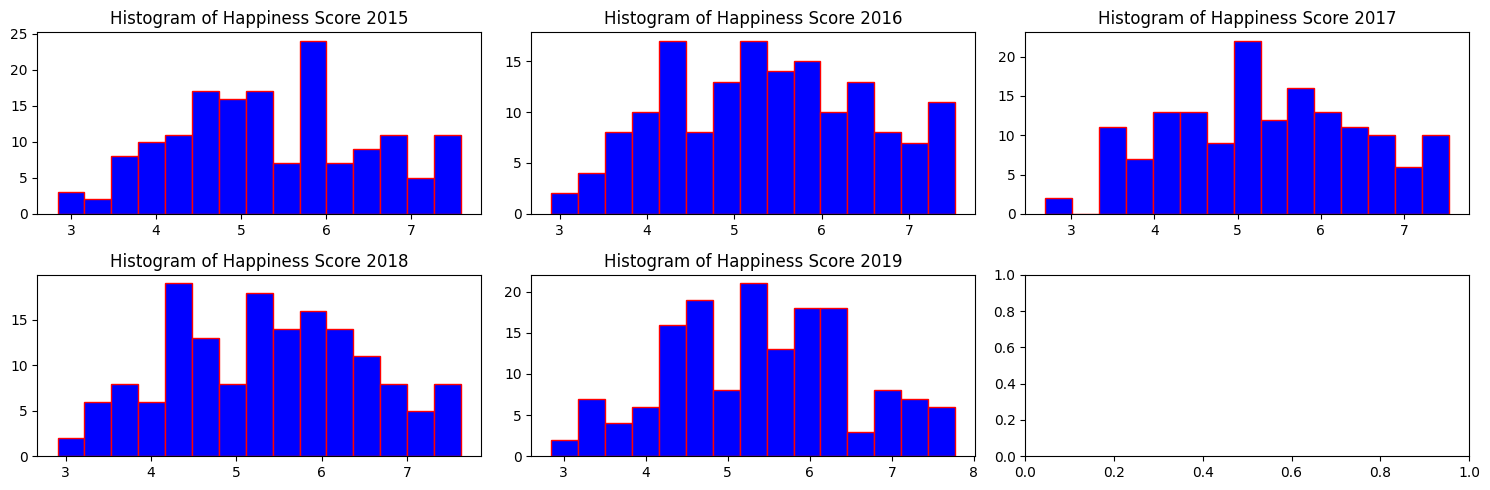

In [ ]:
fig, axs  = plt.subplots(2, 3, figsize=(15, 5))
axs = axs.flatten()
keys = list(Happy_df.keys())

for i, key in enumerate(keys):
    axs[i].hist(Happy_df[key]['Happiness Score'], facecolor='b', edgecolor='red', bins=15)
    axs[i].set_title('Histogram of Happiness Score {}'.format(key))

plt.tight_layout()
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\2839269866.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Happiness Score', palette=colors)


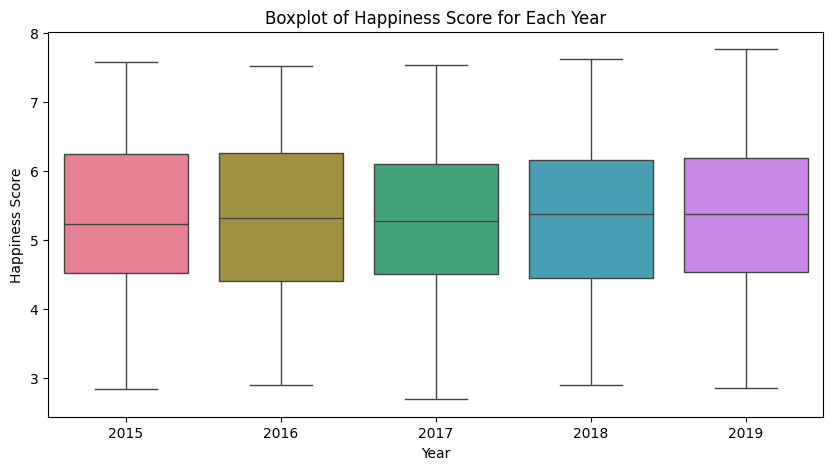

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("husl", len(keys))

sns.boxplot(data=all_df, x='Year', y='Happiness Score', palette=colors)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Boxplot of Happiness Score for Each Year')
plt.show()


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\1812143948.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Economy (GDP per Capita)', palette=colors)


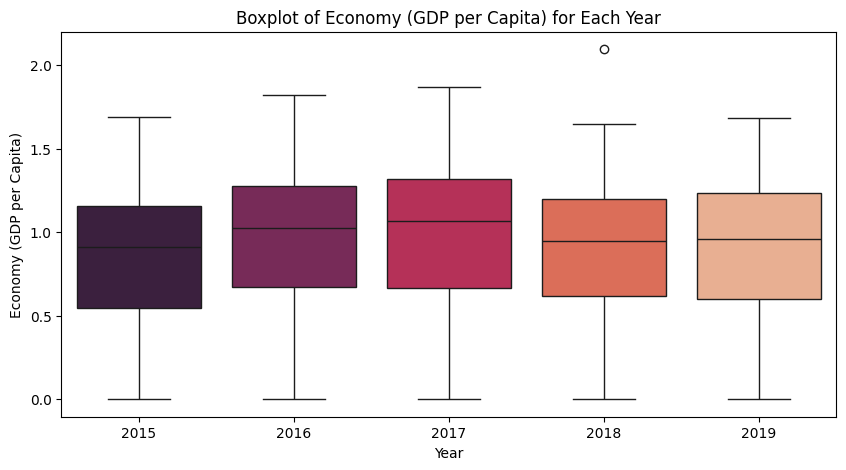

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("rocket", len(keys))

sns.boxplot(data=all_df, x='Year', y='Economy (GDP per Capita)', palette=colors)
plt.xlabel('Year')
plt.ylabel('Economy (GDP per Capita)')
plt.title('Boxplot of Economy (GDP per Capita) for Each Year')
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\3440884405.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Family', palette=colors)


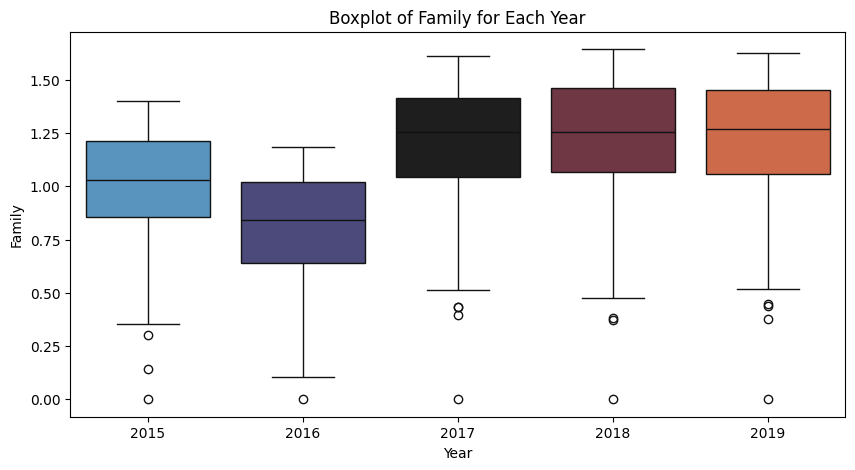

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("icefire", len(keys))

sns.boxplot(data=all_df, x='Year', y='Family', palette=colors)
plt.xlabel('Year')
plt.ylabel('Family')
plt.title('Boxplot of Family for Each Year')
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\3219640134.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Health (Life Expectancy)', palette=colors)


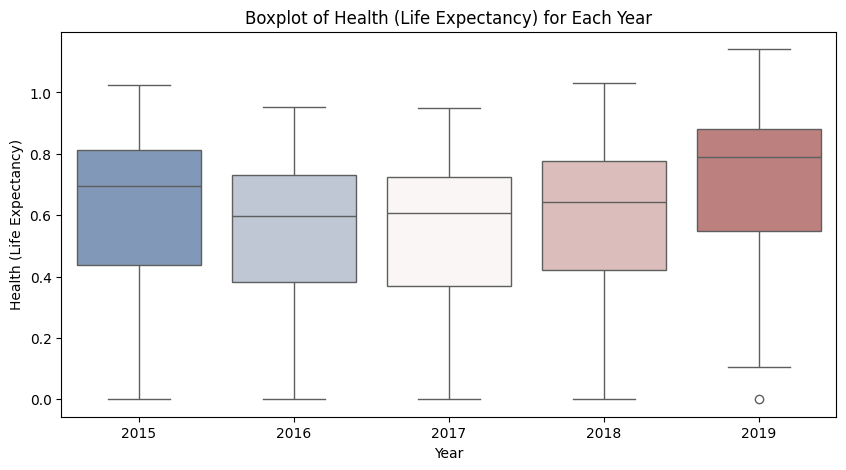

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("vlag", len(keys))

sns.boxplot(data=all_df, x='Year', y='Health (Life Expectancy)', palette=colors)
plt.xlabel('Year')
plt.ylabel('Health (Life Expectancy)')
plt.title('Boxplot of Health (Life Expectancy) for Each Year')
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\118767667.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Generosity', palette=colors)


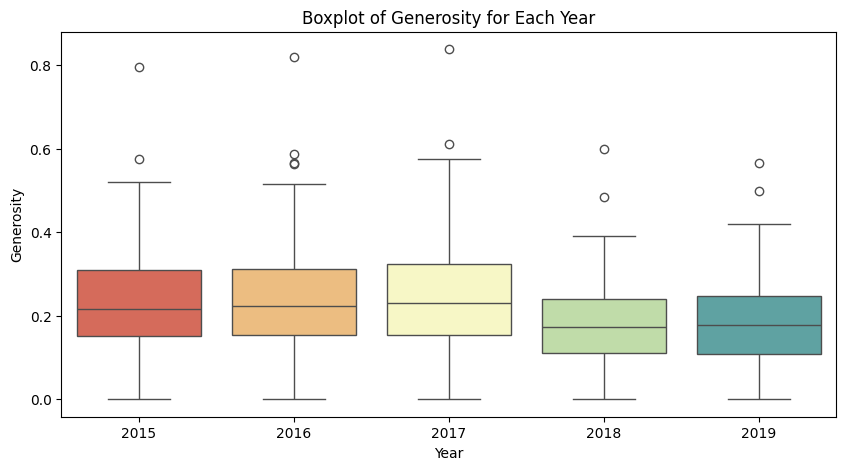

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("Spectral", len(keys))

sns.boxplot(data=all_df, x='Year', y='Generosity', palette=colors)
plt.xlabel('Year')
plt.ylabel('Generosity')
plt.title('Boxplot of Generosity for Each Year')
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\1012247682.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Trust (Government Corruption)', palette=colors)


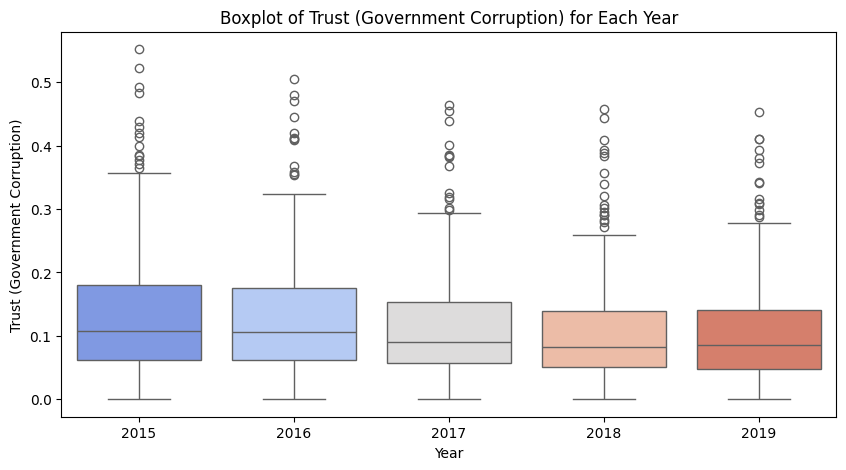

In [ ]:
plt.figure(figsize=(10,5))
keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("coolwarm", len(keys))

sns.boxplot(data=all_df, x='Year', y='Trust (Government Corruption)', palette=colors)
plt.xlabel('Year')
plt.ylabel('Trust (Government Corruption)')
plt.title('Boxplot of Trust (Government Corruption) for Each Year')
plt.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_40248\562022025.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x='Year', y='Dystopia Residual', palette=colors)


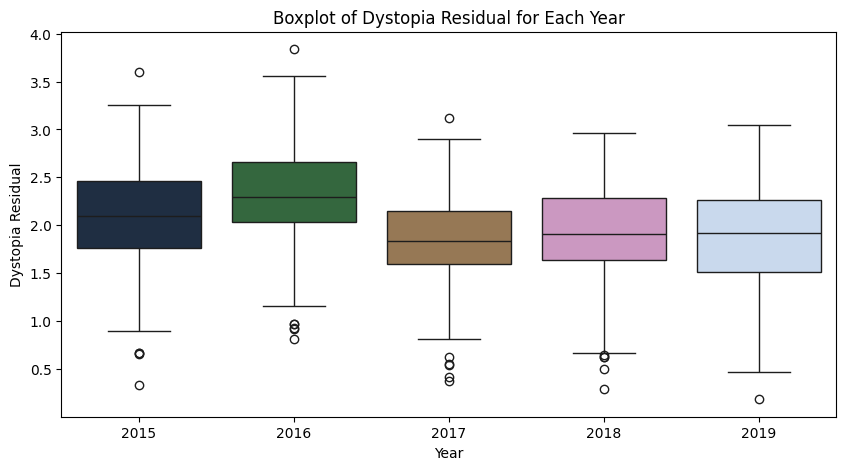

In [ ]:
plt.figure(figsize=(10,5))

keys = list(Happy_df.keys())
data = []

for key in keys:
    _df = Happy_df[key].copy()
    _df ['Year'] = key
    data.append(_df)

all_df = pd.concat(data)

colors = sns.color_palette("cubehelix", len(keys))

sns.boxplot(data=all_df, x='Year', y='Dystopia Residual', palette=colors)
plt.xlabel('Year')
plt.ylabel('Dystopia Residual')
plt.title('Boxplot of Dystopia Residual for Each Year')
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [ ]:
display('2015',Happy_df['2015'].describe(include='all').T)
display('2016',Happy_df['2016'].describe(include='all').T)
display('2017',Happy_df['2017'].describe(include='all').T)
display('2018',Happy_df['2018'].describe(include='all').T)
display('2019',Happy_df['2019'].describe(include='all').T)

'2015'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,158,158,Switzerland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,158,10,Sub-Saharan Africa,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,158.0,NaN,NaN,NaN,79.493671,45.754363,1.0,40.25,79.5,118.75,158.0
Happiness Score,158.0,NaN,NaN,NaN,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587
Standard Error,158.0,NaN,NaN,NaN,0.047885,0.017146,0.01848,0.037268,0.04394,0.0523,0.13693
Economy (GDP per Capita),158.0,NaN,NaN,NaN,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.69042
Family,158.0,NaN,NaN,NaN,0.991046,0.272369,0.0,0.856823,1.02951,1.214405,1.40223
Health (Life Expectancy),158.0,NaN,NaN,NaN,0.630259,0.247078,0.0,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,NaN,NaN,NaN,0.428615,0.150693,0.0,0.32833,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,NaN,NaN,NaN,0.143422,0.120034,0.0,0.061675,0.10722,0.180255,0.55191


'2016'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,157,157,Denmark,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,157,10,Sub-Saharan Africa,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,157.0,NaN,NaN,NaN,78.980892,45.46603,1.0,40.0,79.0,118.0,157.0
Happiness Score,157.0,NaN,NaN,NaN,5.382185,1.141674,2.905,4.404,5.314,6.269,7.526
Lower Confidence Interval,157.0,NaN,NaN,NaN,5.282395,1.148043,2.732,4.327,5.237,6.154,7.46
Upper Confidence Interval,157.0,NaN,NaN,NaN,5.481975,1.136493,3.078,4.465,5.419,6.434,7.669
Economy (GDP per Capita),157.0,NaN,NaN,NaN,0.95388,0.412595,0.0,0.67024,1.0278,1.27964,1.82427
Family,157.0,NaN,NaN,NaN,0.793621,0.266706,0.0,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,NaN,NaN,NaN,0.557619,0.229349,0.0,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,NaN,NaN,NaN,0.370994,0.145507,0.0,0.25748,0.39747,0.48453,0.60848


'2017'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,155,155,Norway,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,155.0,NaN,NaN,NaN,78.0,44.888751,1.0,39.5,78.0,116.5,155.0
Happiness Score,155.0,NaN,NaN,NaN,5.354019,1.13123,2.693,4.5055,5.279,6.1015,7.537
Whisker.high,155.0,NaN,NaN,NaN,5.452326,1.118542,2.864884,4.608172,5.370032,6.1946,7.62203
Whisker.low,155.0,NaN,NaN,NaN,5.255713,1.14503,2.521116,4.374955,5.193152,6.006527,7.479556
Economy (GDP per Capita),155.0,NaN,NaN,NaN,0.984718,0.420793,0.0,0.663371,1.064578,1.318027,1.870766
Family,155.0,NaN,NaN,NaN,1.188898,0.287263,0.0,1.042635,1.253918,1.414316,1.610574
Health (Life Expectancy),155.0,NaN,NaN,NaN,0.551341,0.237073,0.0,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,NaN,NaN,NaN,0.408786,0.149997,0.0,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,NaN,NaN,NaN,0.246883,0.13478,0.0,0.154106,0.231538,0.323762,0.838075


'2018'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Happiness Rank,156.0,NaN,NaN,NaN,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
Country,156,156,Finland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,156.0,NaN,NaN,NaN,5.375917,1.119506,2.905,4.45375,5.378,6.1685,7.632
Economy (GDP per Capita),156.0,NaN,NaN,NaN,0.891449,0.391921,0.0,0.61625,0.9495,1.19775,2.096
Family,156.0,NaN,NaN,NaN,1.213237,0.302372,0.0,1.06675,1.255,1.463,1.644
Health (Life Expectancy),156.0,NaN,NaN,NaN,0.597346,0.247579,0.0,0.42225,0.644,0.77725,1.03
Freedom,156.0,NaN,NaN,NaN,0.454506,0.162424,0.0,0.356,0.487,0.5785,0.724
Generosity,156.0,NaN,NaN,NaN,0.181006,0.098471,0.0,0.1095,0.174,0.239,0.598
Trust (Government Corruption),156.0,NaN,NaN,NaN,0.112905,0.096843,0.0,0.051,0.082,0.139,0.457
Dystopia Residual,156.0,NaN,NaN,NaN,1.925466,0.517229,0.291,1.63525,1.909,2.28575,2.961


'2019'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Happiness Rank,156.0,NaN,NaN,NaN,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
Country,156,156,Finland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,156.0,NaN,NaN,NaN,5.407096,1.11312,2.853,4.5445,5.3795,6.1845,7.769
Economy (GDP per Capita),156.0,NaN,NaN,NaN,0.905147,0.398389,0.0,0.60275,0.96,1.2325,1.684
Family,156.0,NaN,NaN,NaN,1.208814,0.299191,0.0,1.05575,1.2715,1.4525,1.624
Health (Life Expectancy),156.0,NaN,NaN,NaN,0.725244,0.242124,0.0,0.54775,0.789,0.88175,1.141
Freedom,156.0,NaN,NaN,NaN,0.392571,0.143289,0.0,0.308,0.417,0.50725,0.631
Generosity,156.0,NaN,NaN,NaN,0.184846,0.095254,0.0,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,NaN,NaN,NaN,0.110603,0.094538,0.0,0.047,0.0855,0.14125,0.453
Dystopia Residual,156.0,NaN,NaN,NaN,1.879872,0.528859,0.184,1.513,1.916,2.2675,3.05


In [ ]:
print("Year 2015: \n",Happy_df['2015']['Happiness Score'].mean(), ',', Happy_df['2015']['Happiness Score'].std())
print("Year 2016: \n",Happy_df['2016']['Happiness Score'].mean(), ',', Happy_df['2015']['Happiness Score'].std())
print("Year 2017: \n",Happy_df['2017']['Happiness Score'].mean(), ',', Happy_df['2015']['Happiness Score'].std())
print("Year 2018: \n",Happy_df['2018']['Happiness Score'].mean(), ',', Happy_df['2015']['Happiness Score'].std())
print("Year 2019: \n",Happy_df['2019']['Happiness Score'].mean(), ',', Happy_df['2015']['Happiness Score'].std())

Year 2015: 
 5.375734177215189 , 1.1450101349520665
Year 2016: 
 5.382184713375795 , 1.1450101349520665
Year 2017: 
 5.354019355773926 , 1.1450101349520665
Year 2018: 
 5.375916666666667 , 1.1450101349520665
Year 2019: 
 5.407096153846155 , 1.1450101349520665


In [ ]:
print("Year 2015:", np.quantile(Happy_df['2015']['Happiness Score'],0.25))
print("Year 2016:", np.quantile(Happy_df['2016']['Happiness Score'],0.25))
print("Year 2017:", np.quantile(Happy_df['2017']['Happiness Score'],0.25))
print("Year 2018:", np.quantile(Happy_df['2018']['Happiness Score'],0.25))
print("Year 2019:", np.quantile(Happy_df['2019']['Happiness Score'],0.25))

Year 2015: 4.526
Year 2016: 4.404
Year 2017: 4.50550007820129
Year 2018: 4.45375
Year 2019: 4.5445


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

#### Question 1 answer

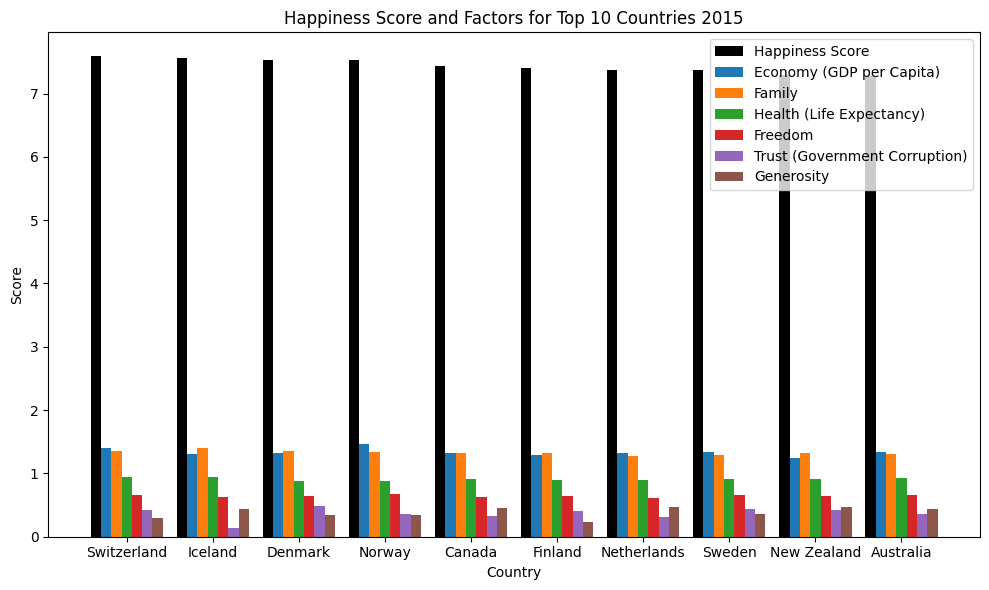

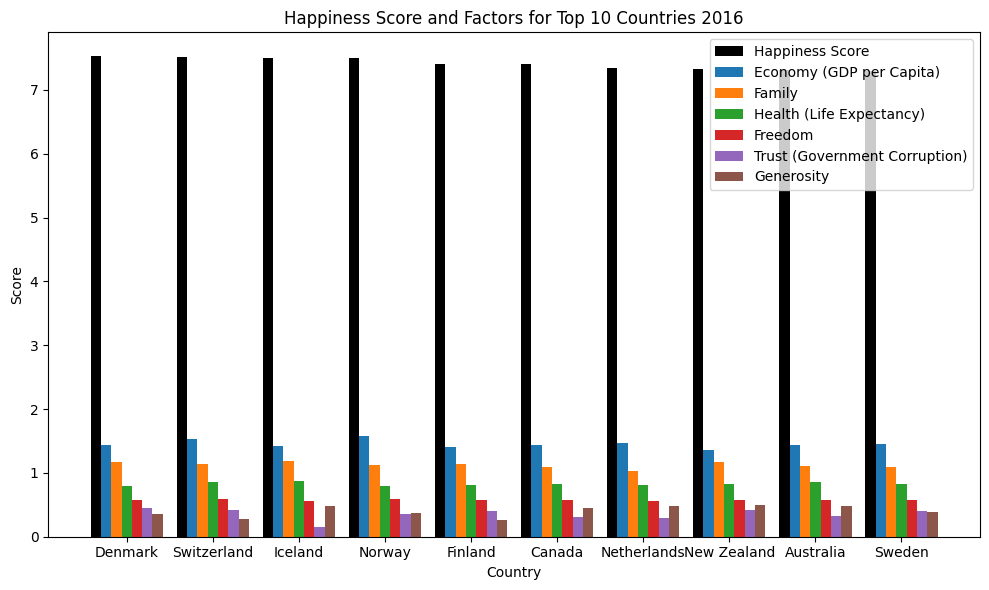

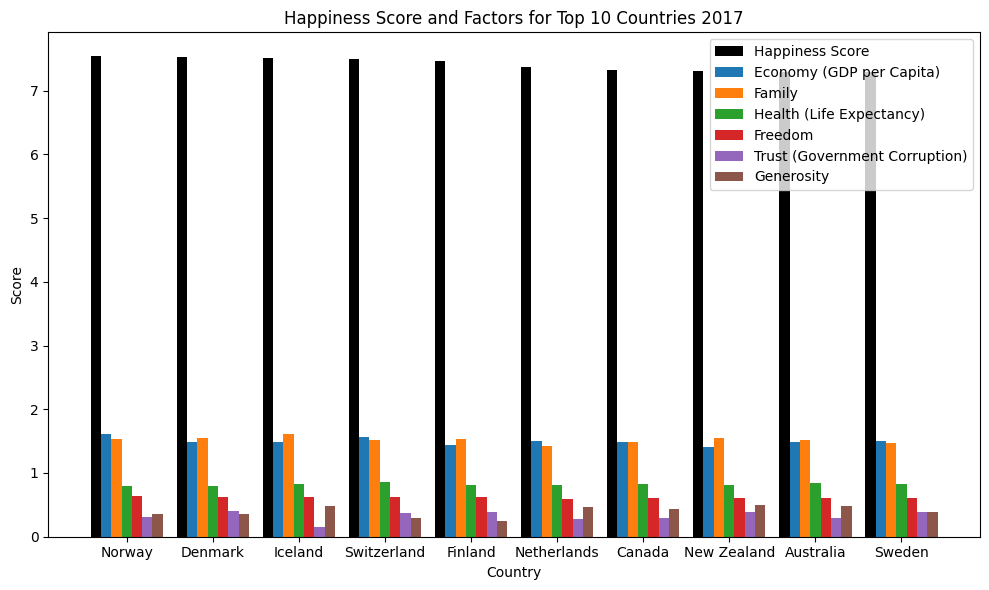

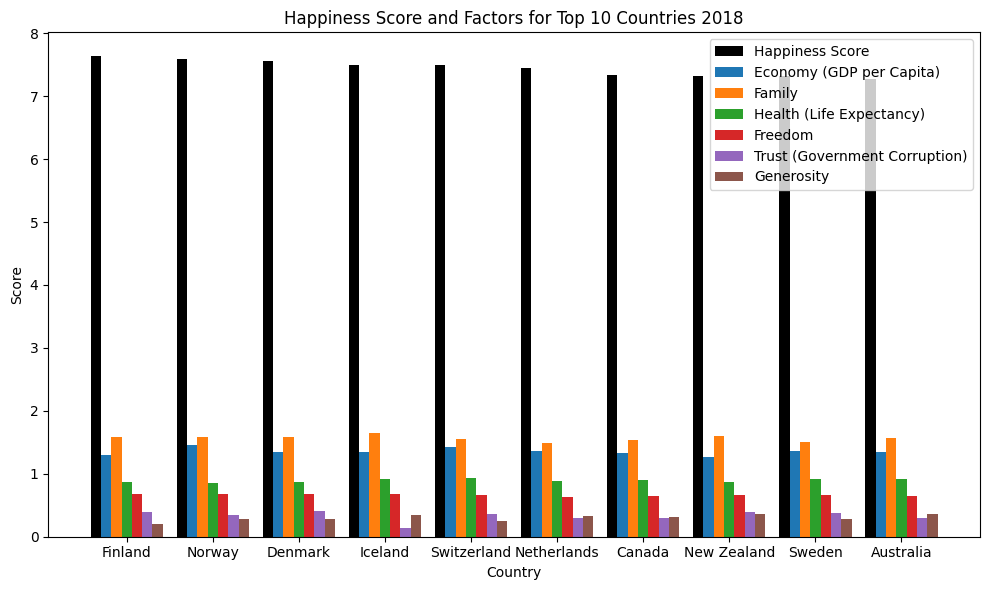

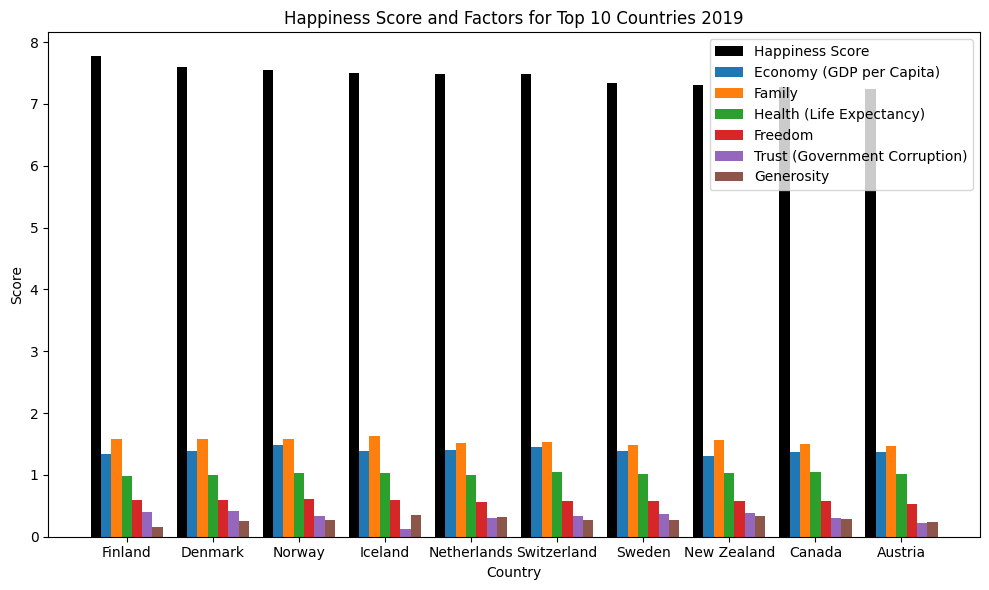

In [ ]:
for key in Happy_df:
    df_top10 = Happy_df[key].sort_values(by='Happiness Score', ascending=False).head(10)

    countries = df_top10['Country']
    happiness_score = df_top10['Happiness Score']
    factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
    scores = df_top10[factors].values.T

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.12
    index = np.arange(len(countries))

    ax.bar(index, happiness_score, bar_width, label='Happiness Score', color='black')
    for i, factor in enumerate(factors):
        ax.bar(index + (i + 1) * bar_width, scores[i], bar_width, label=factor)


    ax.set_xlabel('Country')
    ax.set_ylabel('Score')
    ax.set_title('Happiness Score and Factors for Top 10 Countries {}'.format(key))
    ax.set_xticks(index + bar_width * (len(factors) / 2))
    ax.set_xticklabels(countries)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [92]:
top_2015 = Happy_df['2015'].sort_values(by='Happiness Rank').head(10).copy()
countries_2015 = top_2015['Country'].tolist()

chng_2016 = Happy_df['2016'][Happy_df['2016']['Country'].isin(countries_2015)]
chng_2017 = Happy_df['2017'][Happy_df['2017']['Country'].isin(countries_2015)]
chng_2018 = Happy_df['2018'][Happy_df['2018']['Country'].isin(countries_2015)]
chng_2019 = Happy_df['2019'][Happy_df['2019']['Country'].isin(countries_2015)]

top_2015['Year'] = 2015
chng_2016['Year'] = 2016
chng_2017['Year'] = 2017
chng_2018['Year'] = 2018
chng_2019['Year'] = 2019


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\2816823465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chng_2016['Year'] = 2016
C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\2816823465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chng_2017['Year'] = 2017
C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\2816823465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### Question 2

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_41228\3114697007.py:10: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.barplot(data=merged_df, x='Country', y='Happiness Score', hue='Year', palette=sns.color_palette("Paired"))


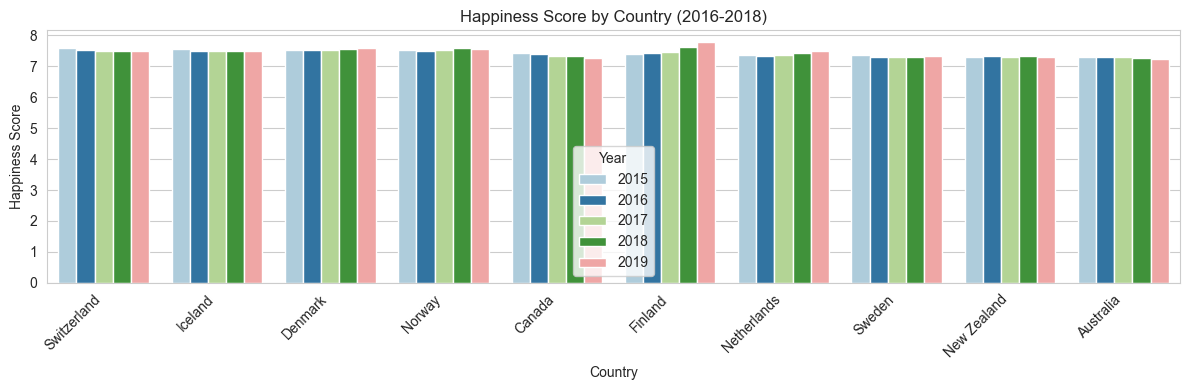

In [102]:
dfs = [top_2015, chng_2016, chng_2017, chng_2018, chng_2019]
merged_df = pd.concat(dfs)


pivot_df = merged_df.pivot(index='Country', columns='Year', values='Happiness Score')


plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")
sns.barplot(data=merged_df, x='Country', y='Happiness Score', hue='Year', palette=sns.color_palette("Paired"))
plt.title('Happiness Score by Country (2016-2018)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [103]:
df_2015 = Happy_df['2015'].copy()
df_2016 = Happy_df['2016'].copy()
df_2017 = Happy_df['2017'].copy()
df_2018 = Happy_df['2018'].copy()
df_2019 = Happy_df['2019'].copy()


df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

### Question 3 Answer

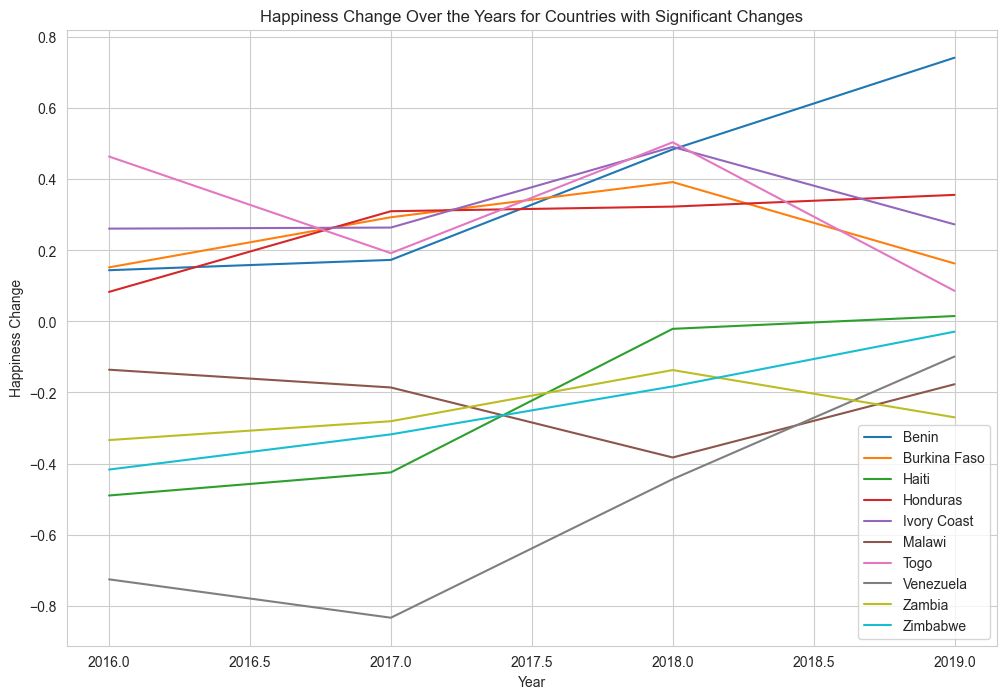

In [191]:
df_con = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], sort=False)
happy_pivot = df_con.pivot(index='Country', columns='Year', values='Happiness Score').reset_index()
happy_change = happy_pivot.set_index('Country').diff(axis=1).reset_index()

happy_change = happy_change[['Country', 2016, 2017, 2018, 2019]]
happy_change.columns = ['Country', '2016', '2017', '2018', '2019']

happy_change.dropna(inplace=True)
happy_change.reset_index(drop=True, inplace=True)


happy_change_melted = happy_change.melt(id_vars='Country', var_name='Year', value_name='Happiness Change')
happy_change_melted['Year'] = happy_change_melted['Year'].astype(int)
happy_change_melted.sort_values(['Country', 'Year'], inplace=True)

#significate increase or decrease
significant_countries = happy_change_melted.groupby('Country')['Happiness Change'].sum().nlargest(5).index.tolist() + \
                        happy_change_melted.groupby('Country')['Happiness Change'].sum().nsmallest(5).index.tolist()

happy_diff_melted_filtered = happy_change_melted[happy_change_melted['Country'].isin(significant_countries)]

plt.figure(figsize=(12, 8))

# Loop through each country to plot its happiness change over the years
for country in happy_diff_melted_filtered['Country'].unique():
    country_data = happy_diff_melted_filtered[happy_diff_melted_filtered['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Change'], label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Change')
plt.title('Happiness Change Over the Years for Countries with Significant Changes')
plt.legend()
plt.show()

### Bonus Question:
what are the countries with the most Corruption rates through the years?

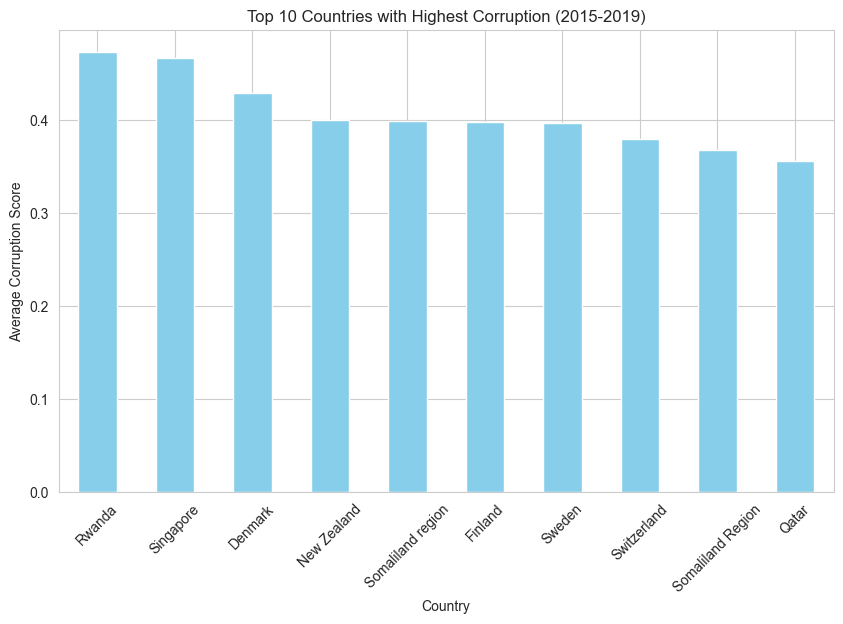

In [190]:
df = [Happy_df['2015'], Happy_df['2016'], Happy_df['2017'], Happy_df['2018'], Happy_df['2019']]
corupt_df = pd.concat(df)

corruption_avg = corupt_df.groupby('Country')['Trust (Government Corruption)'].mean().sort_values(ascending=False)

top_countries = corruption_avg.head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Corruption (2015-2019)')
plt.xlabel('Country')
plt.ylabel('Average Corruption Score')
plt.xticks(rotation=45)
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.